In [2]:
import pandas as pd

In [1]:
# https://www.statbank.dk/statbank5a/default.asp?w=1440
# selected all kommunes and population density 2022

# code for municipality is the first 3 digits of index
# in order to identify the municipality you need to find other towns with the same code
# then use the map above to find which municipality it is. 

In [3]:
df = pd.read_csv('../resources/denmark_pop_and_density.csv', encoding='latin-1')

In [4]:
# split strings in columns into two new columns
df[['municipality_code', 'specific_area_name']] = df['area_name'].str.split('-', expand=True)[[0,1]]

/var/folders/n9/1l93lmxn1791rk7wnv15wd500000gn/T/ipykernel_40617/2228875670.py:3: RuntimeWarning: invalid value encountered in double_scalars
  df_density = pd.DataFrame([(k, v['Population'].sum(), v['Population'].sum()/v['Area (km2)'].sum())\


<AxesSubplot:xlabel='population', ylabel='population_density'>

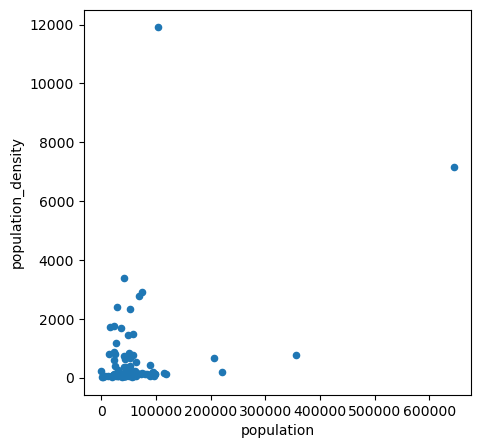

In [5]:
# group by municipality and divide the total population by the total area

df_density = pd.DataFrame([(k, v['Population'].sum(), v['Population'].sum()/v['Area (km2)'].sum())\
                            for k,v in df.groupby('municipality_code')],
                          columns=['municipality_code', 'population', 'population_density'])

df_density.dropna(inplace=True)
df_density.sort_values('population_density', ascending=False, inplace=True)

df_density.plot(kind='scatter', x='population', y='population_density', figsize=(5,5))

In [10]:
print(df_density['municipality_code'].unique().shape)
df_density['population_density'].describe()

(99,)


count       99.000000
mean       600.071572
std       1494.119968
min         14.511895
25%         66.907156
50%        119.283775
75%        475.661716
max      11908.965517
Name: population_density, dtype: float64

In [12]:
df_density['population_density'].median()

119.28377460964018

In [8]:
# get quantiles from the population density and use them to create a new column
# with the population density category
df_density['population_density_quantile'] = pd.qcut(df_density['population_density'], 5, labels=[5,4,3,2,1])

In [11]:
# sample 3 municipalities from each quantile
municips = [v.municipality_code.sample(3, random_state=42).values\
             for k,v in df_density.groupby('population_density_quantile')]

# flatten the list
municips = [item for sublist in municips for item in sublist]

In [11]:
df_density.sort_values('population_density', ascending=False)

,municipality_code,population,population_density
2,147,103608.0,11908.965517
1,101,644431.0,7152.397336
14,175,41382.0,3391.967213
6,157,74217.0,2899.101563
7,159,69259.0,2781.485944
...,...,...,...
85,760,56203.0,38.139929
73,665,19398.0,38.057681
81,741,3716.0,32.711268
61,550,36849.0,28.698598


In [17]:
code_mappings: dict = {
    '846': 'Mariagerfjord Kommune',
    '741': 'Samsø Kommune',
    '760': 'Ringkøbing-Skjern Kommune',
    '710': 'Favrskov Kommune',
    '480': 'Nordfyns Kommune',
    '492': 'Ærø Kommune',
    '270': 'Gribskov Kommune',
    '730': 'Randers Kommune',
    '450': 'Nyborg Kommune',
    '169': 'Høje-Taastrup Kommune',
    '621': 'Kolding Kommune',
    '250': 'Frederikssund Kommune',
    '147': 'Frederiksberg Kommune',
    '230': 'Rudersdal Kommune',
    '155': 'Dragør Kommune',
    '101': 'København Kommune',
    '147': 'Frederiksberg Kommune',
    '825': 'Læsø Kommune',
    '550': 'Tønder Kommune',
    '665': 'Lemvig Kommune',
    '760': 'Ringkøbing-Skjern Kommune'
}
# map the codes to the municipality names in the dataframe
df_density['municipality'] = df_density['municipality_code'].map(code_mappings)
df_density[df_density['municipality'].notna()].sort_values(
    'population_density', ascending=False)\
        .to_csv('../resources/denmark_pop_density_sample.csv', index=False)

In [44]:
df.sort_values(by='Population density (km2)', ascending=False, inplace=True)
df = df[df['Population density (km2)']!=0]
# remove rows with "rural areas" in index
#df = df[~df.index.str.contains('Rural areas')]

In [37]:
# check what is being measured
# https://www.statbank.dk/statbank5a/Graphics/mapanalyser.asp?maintable=BY3&lang=1
df[df.index.str.contains('Varde')]

,Population density (km2)
573-10898 Varde,1471.1


In [41]:
# check what is being measured
# https://www.statbank.dk/statbank5a/Graphics/mapanalyser.asp?maintable=BY3&lang=1
df[df.index.str.contains('159-99999')]

,Population density (km2)
159-99999 Rural areas,1.8
